<a href="https://colab.research.google.com/github/t4t5u0/PatternRecognition/blob/feature%2Fdct/%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3%E8%AA%8D%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import cv2
print(cv2.__version__)

4.1.2


In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
path = "/content/norm64.png"

In [39]:
img = cv2.imread(path,0)#グレースケールで読み込み

In [40]:
img

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 60, 35, ..., 16, 28, 27],
       [ 0, 56, 13, ..., 22, 23, 22],
       ...,
       [ 0, 27, 20, ..., 18, 14, 11],
       [ 0, 23, 17, ..., 22, 16, 10],
       [ 0, 15, 12, ..., 15, 12,  8]], dtype=uint8)

In [41]:
class DCT:
	def __init__(self,N):
		self.N = N	# データ数．
		# 1次元，2次元離散コサイン変換の基底ベクトルをあらかじめ作っておく
		self.phi_1d = np.array([ self.phi(i) for i in range(self.N) ])
		
		# Nが大きいとメモリリークを起こすので注意
		# MNISTの28x28程度なら問題ない
		self.phi_2d = np.zeros((N,N,N,N))
		for i in range(N):
			for j in range(N):
				phi_i,phi_j = np.meshgrid(self.phi_1d[i],self.phi_1d[j])
				self.phi_2d[i,j] = phi_i*phi_j

	def dct(self,data):
		""" 1次元離散コサイン変換を行う """
		return self.phi_1d.dot(data)
	
	def idct(self,c):
		""" 1次元離散コサイン逆変換を行う """
		return np.sum( self.phi_1d.T * c ,axis=1)
	
	def dct2(self,data):
		""" 2次元離散コサイン変換を行う """
		return np.sum(self.phi_2d.reshape(N*N,N*N)*data.reshape(N*N),axis=1).reshape(N,N)
	
	def idct2(self,c):
		""" 2次元離散コサイン逆変換を行う """
		return np.sum((c.reshape(N,N,1)*self.phi_2d.reshape(N,N,N*N)).reshape(N*N,N*N),axis=0).reshape(N,N)
	
	def phi(self,k):
		""" 離散コサイン変換(DCT)の基底関数 """
		# DCT-II
		if k == 0:
			return np.ones(self.N)/np.sqrt(self.N)
		else:
			return np.sqrt(2.0/self.N)*np.cos((k*np.pi/(2*self.N))*(np.arange(self.N)*2+1))

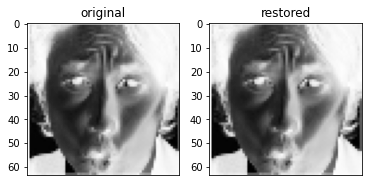

[[ 8.04989062e+03 -7.85427160e+02 -1.53267469e+03 ...  7.86385023e+00
   5.58134574e+00 -8.40301575e+00]
 [ 2.02529164e+03 -7.40785385e+00 -1.97769604e+02 ...  1.20387170e+01
  -2.99226952e+00  1.46594183e+01]
 [-1.81753486e+03 -1.24340666e+03 -5.39290597e+02 ...  1.40838579e+01
   1.26159213e+01 -1.56737930e+01]
 ...
 [ 7.04299129e+00  1.35496853e+01 -1.54806277e+00 ... -5.36421410e+00
   5.88523852e+00 -8.76087102e+00]
 [ 2.39861541e+01 -1.71219299e+01  2.27539530e+01 ...  2.00612447e-01
  -1.16861795e+01  6.65438597e+00]
 [ 5.12525175e+00 -1.62358608e+01  1.32471597e+01 ...  4.52730910e+00
  -3.83085880e+00 -7.11573390e+00]]


In [42]:
if __name__=="__main__":
    N = 64			# データの次元は64x64とする
    dct = DCT(64)	# 離散コサイン変換を行うクラスを作成
    
    c = dct.dct2(img)	# 2次元離散コサイン変換
    y = dct.idct2(c)	# 2次元離散コサイン逆変換
    
    # 元の画像と復元したものを表示
    plt.subplot(1,2,1)
    plt.imshow(img,cmap="Greys")
    plt.title("original")
    plt.xticks([])
    plt.subplot(1,2,2)
    plt.imshow(y,cmap="Greys")
    plt.title("restored")
    plt.xticks([])
    plt.show()    

    print(c)